In [1]:
import pandas as pd

In [2]:
#Load some house sales data
df = pd.read_csv('home_data.csv')

In [3]:
len(df)

21613

In [4]:
df.columns #show the features

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

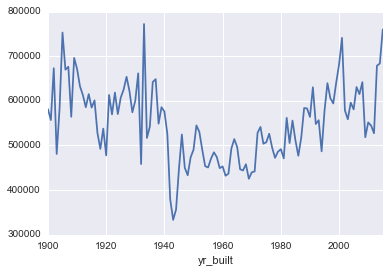

In [6]:
#explore the data for housing sales
#no obvious relation between "yr_built" and "price"
df.groupby(['yr_built'])['price'].mean().plot()

(0, 8000000)

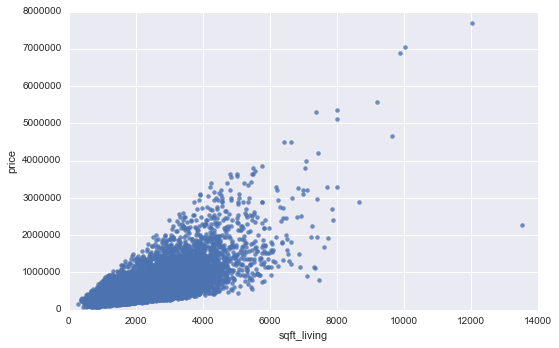

In [7]:
sns.lmplot(x='sqft_living', y='price', data=df, 
           fit_reg=False, aspect=1.5)
plt.xlim(0,14000)
plt.ylim(0, 8000000)

In [172]:
#create a simple regression model of sqft_living to price

#split data set into training set and testing set.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, 
                                     random_state=100)

In [173]:
#use training set to find a simple regression model of sqft_living to price
from sklearn import linear_model
import numpy as np
train_y = train_df['price'].values
train_x = train_df['sqft_living'].values

train_x_shape = np.reshape(train_x,(len(train_x),1))
train_y_shape = np.reshape(train_y,(len(train_y),1))

#get a simple linear regression model
regr = linear_model.LinearRegression()
regr_model = regr.fit(train_x_shape, train_y_shape)

In [174]:
#use test set
test_x = test_df['sqft_living'].values
test_y = test_df['price'].values
test_x_shape = np.reshape(test_x, (len(test_x), 1))
test_y_shape = np.reshape(test_y, (len(test_y), 1))

In [175]:
#r^2 - test data
regr_model.score(test_x_shape, test_y_shape)

0.5155709775643955

In [176]:
#calcualte root mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt

predict_test_y = regr_model.predict(test_x_shape)
rmse = sqrt(mean_squared_error(test_y_shape, predict_test_y))
print ("rmse: ", rmse)

rmse:  255511.37661766267


In [177]:
np.mean(test_df['price'].values)

542341.4337265787

(0, 7500000)

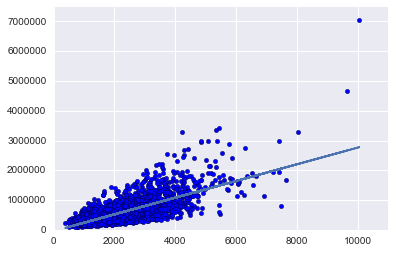

In [17]:
plt.scatter(test_x, test_y)
plt.plot(test_x, regr_model.predict(test_x_shape))
plt.xlim(0,11000)
plt.ylim(0, 7500000)

In [20]:
print ('coefficient(avg price per square feet): ', regr_model.coef_)
print ('interscept: ', regr_model.intercept_)

coefficient(avg price per square feet):  [[280.68541572]]
interscept:  [-42628.97389957]


In [28]:
#explore other features in data set
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
           'floors', 'zipcode', 'price']
selected_features_df = df[my_features]

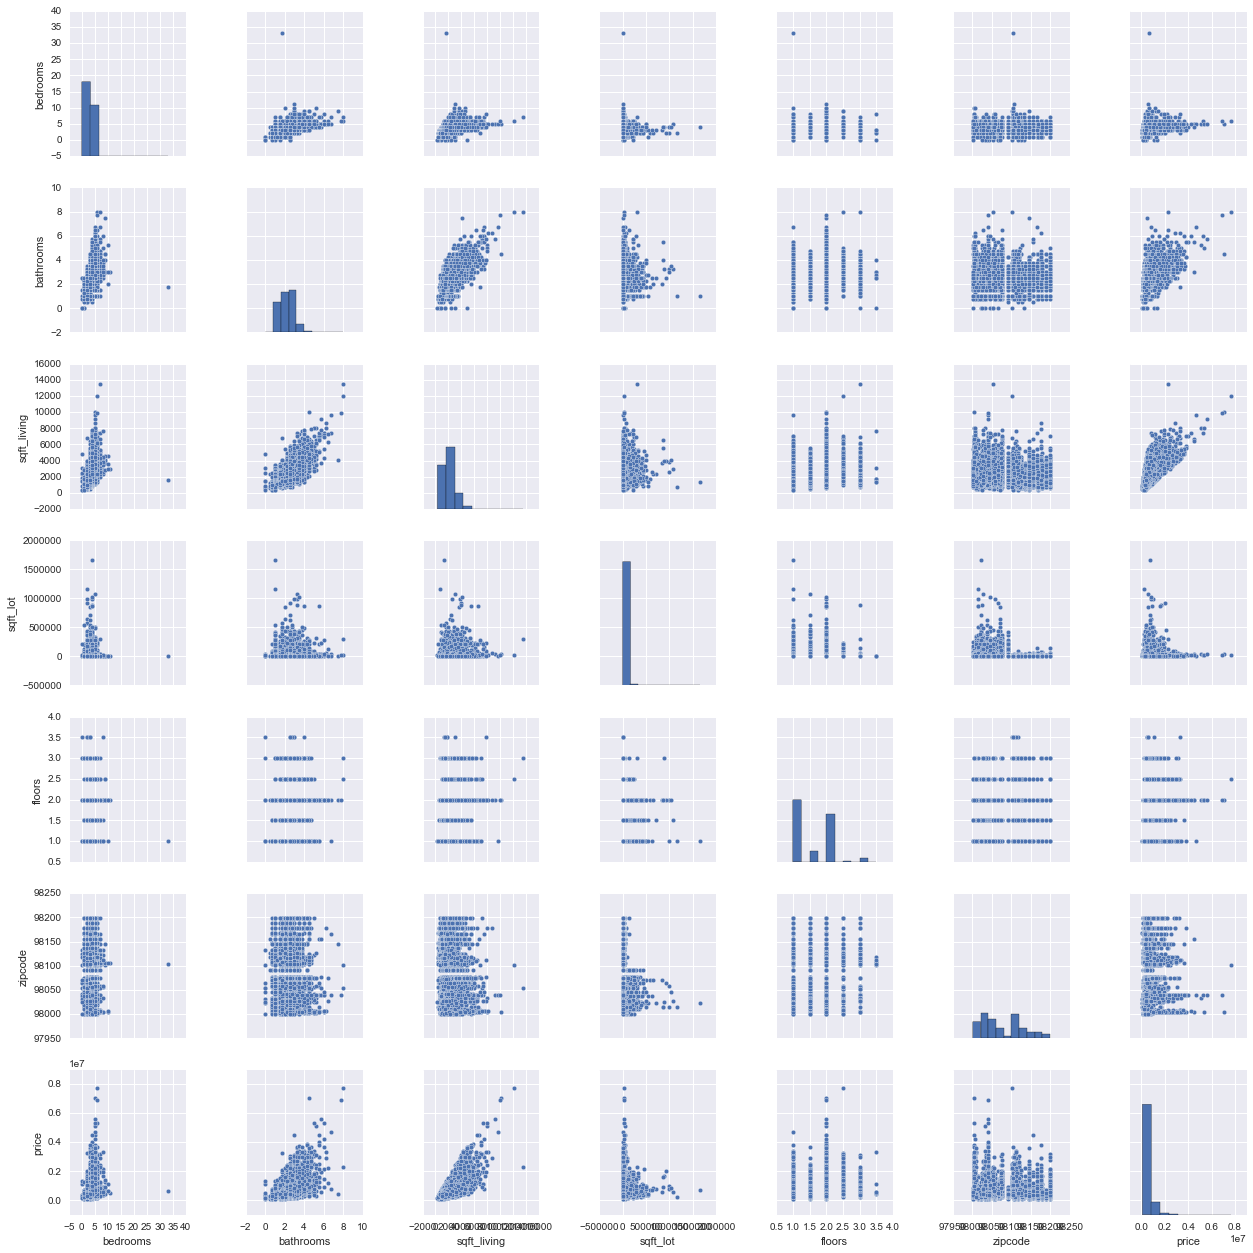

In [30]:
#exploratory data analysis
sns.pairplot(selected_features_df)
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text xticklabel objects>)

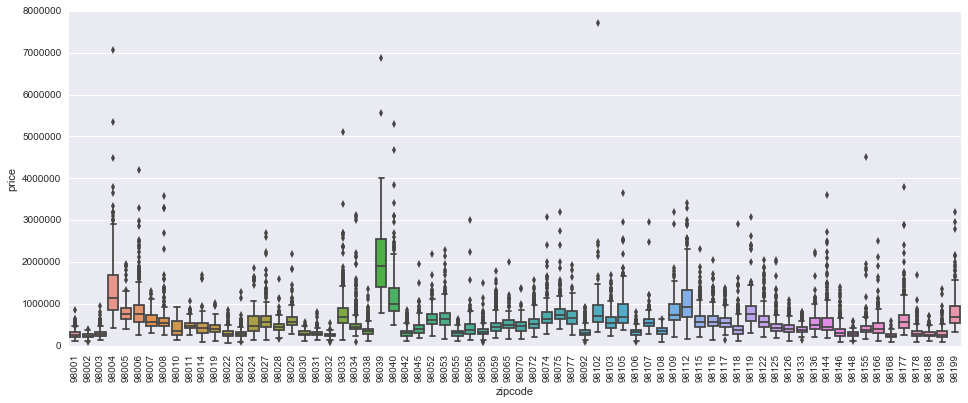

In [52]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="zipcode", y="price", data=selected_features_df)
plt.xticks(rotation=90)

zipcode = '98039' has much higher avg price.

In [180]:
#Build a regression model with more features
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
           'floors', 'zipcode']
train_multip_x = train_df[my_features].values

#get a simple linear regression model
lm = linear_model.LinearRegression()
regr_model_multi = lm.fit(train_multip_x, train_y)

test_multip_x = test_df[my_features].values

#calcualte root mean square error
predict_test_y = regr_model_multi.predict(test_multip_x)
rmse = sqrt(mean_squared_error(test_y_shape, predict_test_y))
print ("rmse: ", rmse)

#r^2 - test data
regr_model_multi.score(test_multip_x, test_y)

rmse:  250717.1663839152


0.533579304796198

In [227]:
#add some more features, rmse is going down, and r^2 is increased.
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
           'floors', 'zipcode', 'waterfront']
train_multip_x = train_df[my_features].values

#get a simple linear regression model
lm = linear_model.LinearRegression()
regr_model_multi = lm.fit(train_multip_x, train_y)

test_multip_x = test_df[my_features].values

#calcualte root mean square error
predict_test_y = regr_model_multi.predict(test_multip_x)
rmse = sqrt(mean_squared_error(test_y_shape, predict_test_y))
print ("rmse: ", rmse)

#r^2 - test data
regr_model_multi.score(test_multip_x, test_y)

rmse:  244273.93087131373


0.5572445530305876

In [137]:
df['id'].dtype

dtype('int64')

In [234]:
#apply learned models to predict 3 houses' prices
def getResults_twoModels(house, model1, model2):
    model1_result = model1.predict(np.reshape(house['sqft_living'].values,(1,1)))
    model2_result = model2.predict(house[my_features])
    return model1_result[0][0], model2_result[0]

In [229]:
#Even this model had a better prediction than the one with only one feature.
#For this particular one, the simple model did a better job.
house1 = df[df['id'] == 5309101200]
r1, r2 = getResults_twoModels(house1, regr_model, regr_model_multi)
print ('model_single_feature_prediction: ', r1)
print ('model_multiple_features_prediction: ', r2)

model_single_feature_prediction:  631016.0238329181
model_multiple_features_prediction:  626337.7870315462


In [222]:
#Predict for a second, fancier house
house2 = df[df['id'] == 1925069082]

In [223]:
house2['price']

1361    2200000
Name: price, dtype: int64

In [228]:
#the second model includes the "waterfront" feature, then predict a very close price
r1, r2 = getResults_twoModels(house2, regr_model, regr_model_multi)
print ('model_single_feature_prediction: ', r1)
print ('model_multiple_features_prediction: ', r2)

model_single_feature_prediction:  1259751.355049905
model_multiple_features_prediction:  2025041.1264685392


In [238]:
#third house
example = {'bedrooms':[8], 
          'bathrooms':[25], 
          'sqft_living':[50000], 
          'sqft_lot':[225000], 
          'floors':[4], 
          'zipcode':['98039'], 
          'condition':[10], 
          'grade':[10],
          'waterfront':[1],
          'view':[4],
          'sqft_above':[37500],
          'sqft_basement':[12500],
          'yr_built':[1994],
          'yr_renovated':[2010],
          'lat':[47.627606],
          'long':[-122.242054],
          'sqft_living15':[5000],
          'sqft_lot15':[40000]}
house3 = pd.DataFrame(example)

In [239]:
r1, r2 = getResults_twoModels(house3, regr_model, regr_model_multi)
print ('model_single_feature_prediction: ', r1)
print ('model_multiple_features_prediction: ', r2)

model_single_feature_prediction:  13991641.812193885
model_multiple_features_prediction:  15770783.994444326


In [240]:
#$16 million

In [245]:
#use all the features, and get a better prediction model
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [244]:
train_all_x = train_df[advanced_features].values

#get a simple linear regression model
lm1 = linear_model.LinearRegression()
regr_model_all = lm1.fit(train_all_x, train_y)

test_all_x = test_df[advanced_features].values

#calcualte root mean square error
predict_test_y = regr_model_all.predict(test_all_x)
rmse = sqrt(mean_squared_error(test_y_shape, predict_test_y))
print ("rmse: ", rmse)

#r^2 - test data
regr_model_all.score(test_all_x, test_y)

rmse:  200096.731553785


0.7029088875153462

In [253]:
len(df[(df['sqft_living'] > 2000) & (df['sqft_living'] < 4000)]) / len(df)

0.4215518437977143